**PART A**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP import load_data

In [ ]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.2/828.2 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=adde3575e67a8f29991751d0c03b60616bbdadc8f135a037025a7167ef3399a2
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [ ]:
boston= load_data('Boston')
print(boston.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


**PART B**

The column represents features of suburbs and each row represents the individual suburbs observation.

In [ ]:
print("Rows:", boston.shape[0])
print("Columns:", boston.shape[1])

Rows: 506
Columns: 13


**PART C**

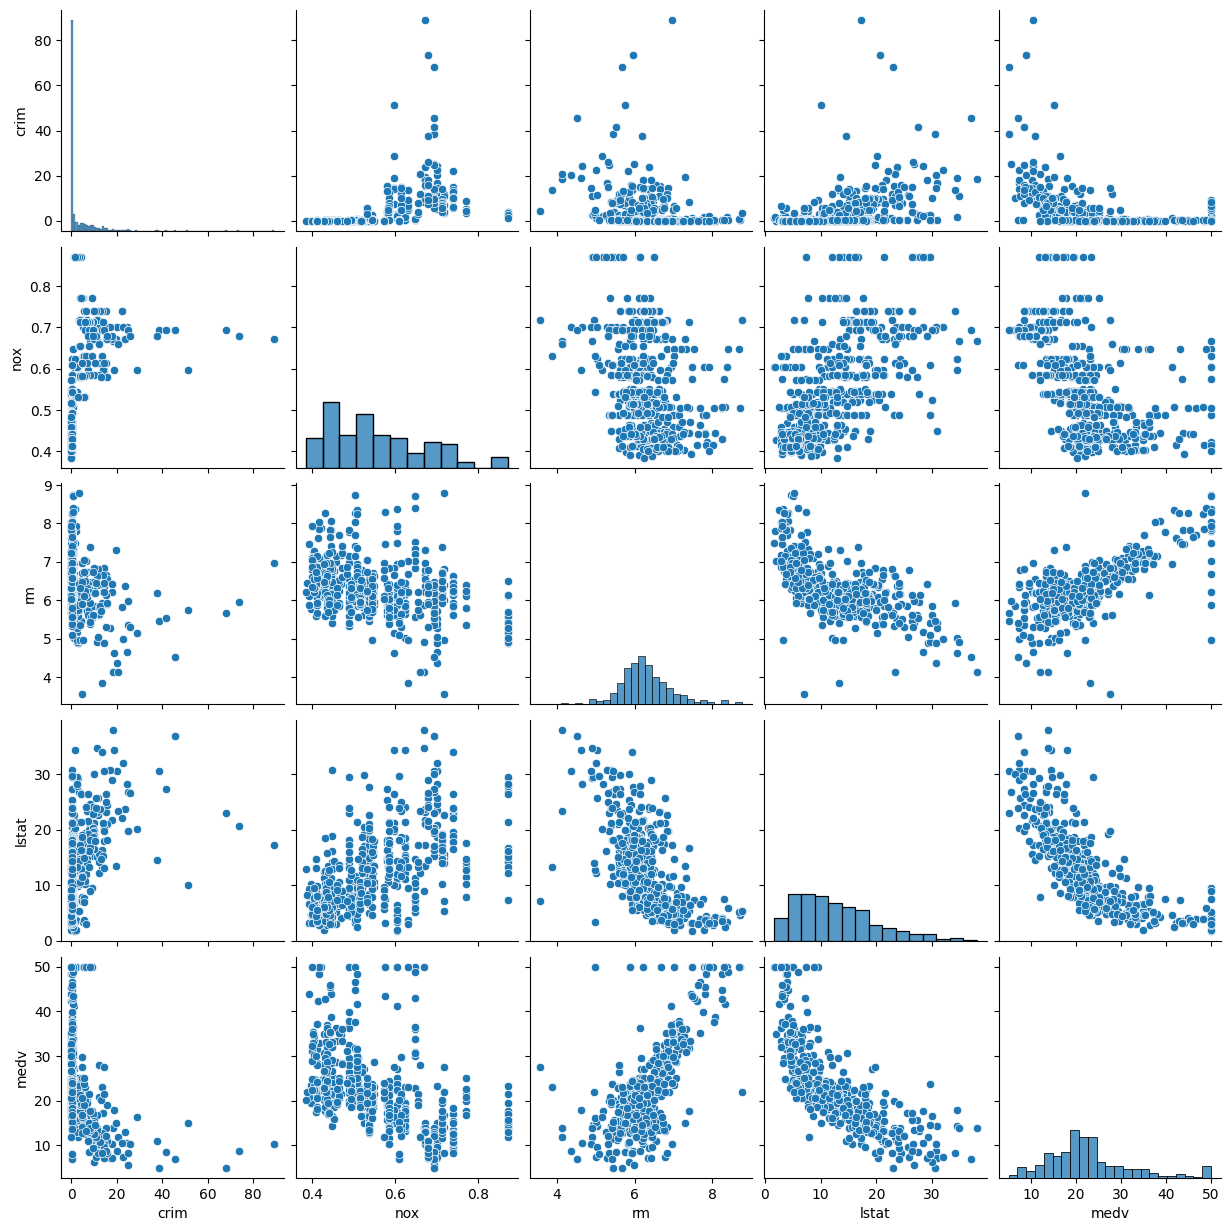

In [ ]:
sns.pairplot(boston[['crim', 'nox', 'rm', 'lstat', 'medv']], diag_kind="hist")
plt.show()

Findings :

rm (rooms) positively associated with medv (more rooms provide higher house value).

lstat (lower status population %) negatively associated with medv.

crim (crime) tends to be higher when lstat is higher.

nox (pollution) increases with indus.

**PART D**

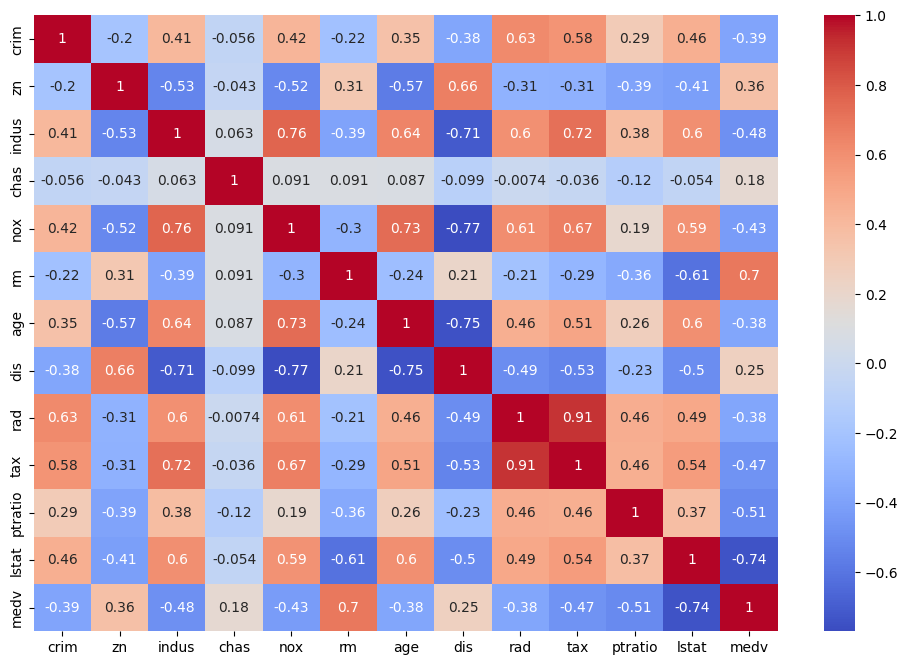

In [ ]:
corr_matrix = boston.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Predictors associated with crime rate (crim)

From scatterplots and correlation heatmap shows:

Higher crime when rad (highway accessibility) is larger.

Higher crime in suburbs with high tax rates.

Lower crime in suburbs that are bound to the river (chas)

**PART E**

In [ ]:
cols = ["crim", "tax", "ptratio"]
summary = boston[cols].describe().T[["min","max","mean","std"]]
max_rows = boston.loc[boston[cols].idxmax(), cols]
print("Summary:\n", summary, "\n")
print("Suburbs with max values:\n", max_rows)

Summary:
                min       max        mean         std
crim       0.00632   88.9762    3.613524    8.601545
tax      187.00000  711.0000  408.237154  168.537116
ptratio   12.60000   22.0000   18.455534    2.164946 

Suburbs with max values:
          crim  tax  ptratio
380  88.97620  666     20.2
488   0.15086  711     20.1
354   0.04301  334     22.0


**PART F**

In [ ]:
print(boston['chas'].value_counts())


chas
0    471
1     35
Name: count, dtype: int64


**PART G**

In [ ]:
print("Median PTRATIO:", boston['ptratio'].median())


Median PTRATIO: 19.05


**PART H**

In [ ]:
idx = boston['medv'].idxmin()
lowest = boston.loc[idx]
print("Lowest medv suburb:\n", lowest)


Lowest medv suburb:
 crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64


Lowest medv = 5.0.

Predictors for this suburb:

crim ≈ 38.4 (very high)

nox ≈ 0.871 (very high)

rm ≈ 3.56 (very low)

lstat ≈ 38 (very high poverty)

Overall: extreme values explain the low home price.

**PART I**

In [ ]:
print("More than 7 rooms:", (boston['rm'] > 7).sum())
print("More than 8 rooms:", (boston['rm'] > 8).sum())

print("Suburbs with > 8 rooms:\n", boston[boston['rm'] > 8]['rm'])

More than 7 rooms: 64
More than 8 rooms: 13
Suburbs with > 8 rooms:
 97     8.069
163    8.375
204    8.034
224    8.266
225    8.725
226    8.040
232    8.337
233    8.247
253    8.259
257    8.704
262    8.398
267    8.297
364    8.780
Name: rm, dtype: float64
